# <center>ВЫЯВЛЕНИЕ ЗАКОНОМЕРНОСТЕЙ ОПРЕДЕЛЯЮЩИХ УСПЕШНОСТЬ ИГРЫ</center>

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные содержат информацию до 2016 года. Нужно отработать принцип работы с данными и спрогнозировать продажы на следующий год. 

Перед нами стоят следующие задачи:

- **изучить информацию**;
- **подготовить данные**: обработать пропуски и дубликаты, привести данные к нужному типу;
- **посчитать суммарные продажи по регионам**;
- **провести исследовательский анализ данных**: проанализировать продажи на разных платформах, выделить актуальный период продаж, выбрать потенциально прибыльные платформы, определить, как влияют на продажи отзывы пользователей и критиков, рассмотреть распределение игр по жанрам;
- **составить портрет пользователя по регионам**;
- **проверить гипотезы**;
- **сделать выводы**.

## ИЗУЧЕНИЕ ДАННЫХ

In [1]:
# Отключаем предупреждения 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Импортируем библиотеки и получим общую информацию

import pandas as pd

games_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games_info.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### ВЫВОД 
Данные содержат 16715 строк, имена столбцов начинаются с заглавной буквы - нужно привести все к нижнему регистру, количественные переменные имеют тип float - нужно заменить его на int, год релиза должен быть в формате datetime. Выведем несколько первых строк и посмотрим, как выглядят данные в таблице. В столбцах есть пропущенные значения, обработаем их на следующем этапе анализа.

## ПРЕДОБРАБОТКА ДАННЫХ

### Проверка регистра

Приведем названия столбцов к нижнему регистру.

In [4]:
# с помощью функции map() применяем нижний регистр строки ко всем столбцам таблицы
games_info.columns = map(str.lower, games_info.columns)
games_info.columns # выведем все названия столбцов для проверки результата

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Проверка на дубликаты

In [5]:
# проверяем наличие дубликатов
games_info.duplicated().sum()

0

Очевидные дубликаты отсутствуют.

### Проверка на пропуски

In [6]:
# проверяем и считаем количество пропусков
games_info.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Вероятно пропуски появились из-за человеческого фактора, колонки попросу не заполнили, оценки и рейтинг могут отсутствовать, к примеру игра слишком старая или наоборот новейшая и рейтинги не успели сформироваться.

В столбцах с названием и жанров по 2 пропуска - посмотрим, что там такое, а в столбцах с оценками и рейтингом пропусков очень много, разберемся с ними следующим шагом.

In [7]:
games_info['name'] = games_info['name'].fillna('unknown') # заменяем пропуски в столбце с названием на "неизвестный"

In [8]:
games_info.query('name == "unknown"') # выводим строки с пропусками в названии

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У платформа GEN (Sega Mega Drive) в 1997 году закончилась поддержка, так же в этих строках отсутствуют оценки и рейтинг, да и продажы 0 или близки к нему, поэтому без последствий для дальнейшего анализа можем удалить эти строки.

In [9]:
games_info = games_info.query('name != "unknown"')
games_info.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

В столбцах с оценками - количественные данные, их значения важны, поэтому их нельзя заполнить нулями, оставим пропущенные значения, в столбце рейтинг заполним пропуски на "*unknown*".

In [10]:
games_info['rating'] = games_info['rating'].fillna('unknown') # заменяем пропуски на unknown
games_info['rating'].isnull().sum() # проверяем отсутствие пропусков в колонке с рейтингом

0

Пропусков в столбце с годом выпуска около 1,5%, это мало, а год выпуска понадобится нам в дальнейшем, поэтому удалим строки, с пропущенным годом.

In [11]:
games_info = games_info.dropna(axis='index', how='any', subset=['year_of_release']) # удалаем строки с пропусками
games_info['year_of_release'].isnull().sum() # проверяем отсутствие пропусков в колонке с годом релиза

0

### Замена типов данных

Заменим тип *float* в столбцах с годом релиза на *int*.

In [12]:
games_info['year_of_release'] = games_info['year_of_release'].astype(int) # меняем тип столбца на целочисленный (int)
games_info.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Оценка выделяющихся значений

Просмотрим значения в столбцах с оценками и рейтингом.

In [13]:
games_info['rating'].unique() # выводи уникальные значения столбца с рейтингом

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [14]:
games_info['user_score'].unique() # выводим уникальные значения столбца с оценкой пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
games_info['critic_score'].unique() # выводи уникальные значения столбца с оценкой критиков

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
print('Количество игр с пользовательской оценкой tbd', len(games_info.query('user_score == "tbd"')))

Количество игр с пользовательской оценкой tbd 2376


Посмотрим, как выглядят данные с таким параметром пользовательского рейтинга.

In [17]:
games_info.query('user_score == "tbd"').head(10) # выводим данные, содержащие рейтинг tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [18]:
print('Количество данных с рейтингом tbd', len(games_info.query('user_score == "tbd"'))) 

Количество данных с рейтингом tbd 2376


Разберемся, что это за значения. *'TBD'* - *to be determined*, быть определенным. Такую аббревиатуру используют при составлении пользовательских рейтингов, когда об описываемом продукте недостаточно отзывов, или же отзывы(рейтинг) подлежит подтверждению модератором. Таких записей 14%, но для дальнейших расчетов в графе *user_score* нужны цифры, варианты - удалить, заменить на 0, заменить медианой
или на значение оценки критиков. Ни один из вариантов замены не выглядит удачным, т.к. оценка пользователей - количественно важный для анализа параметр. Вернемся к этому столбцу позже.

### Суммарные продажи

Посчитаем суммарные продажи по всем регионам для каждой игры.

In [19]:
games_info['total_sales'] = (
    games_info['na_sales'] + games_info['eu_sales'] + games_info['jp_sales'] + games_info['other_sales']
) # считаем сумму проджа по всем регионам
games_info[['name', 'total_sales']].sort_values(by='total_sales', ascending=False).head() # выводим несколько первых строк суммарных продаж для каждой игры

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38


Вернемся к столбцу с оценкой пользователей, выведем отсортированную таблицу с оценкой пользователей tbd и посмотрим на суммарные продажи.

In [20]:
games_info.query('user_score == "tbd"').sort_values(by='total_sales', ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E,2.24
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+,2.22
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E,2.06
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1.94
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E,1.71
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E,1.70


В общем объеме продажи этих игр малы, заменим tbd на 0, чтобы заменить тип данных, в дальнейших рассчетах будет брать столбец       user_score > 0.

In [21]:
import numpy as np

games_info['user_score'] = np.where(games_info['user_score'] == 'tbd', 0, games_info['user_score']) # заменяем tbd на 0
len(games_info.query('user_score == "tbd"')) # проверяем правильность выполнения

0

Заменим тип данных в этом столбце на float.

In [22]:
games_info['user_score'] = games_info['user_score'].astype(float) # заменяем тип данных 
games_info.info() # выводим информацию о таблице, проверяем, что тип данных изменился

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### ВЫВОД
Мы нашли и устранили проблемы в данных, а так же посчитали суммарные продажи для каждой игры, самые высокие продажи за весь рассматриваемый период у игры "Wii Sports".

## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

### Выявление зависимости суммарных продаж от платформы

Посчитаем количество игр, выпущенных в разные годы.

In [23]:
# делаем сводную таблицу по году релиза и названию игры и считаем количество выпущенных игр по годам
amount_by_year = games_info.pivot_table(index = ['year_of_release'], values = 'name', aggfunc='count').reset_index()
amount_by_year = amount_by_year.rename(columns={'name' : 'amount'}) # заменяем имя столбца
amount_by_year.tail(10) # выведем последние 10 лет

,year_of_release,amount
27,2007,1197
28,2008,1427
29,2009,1426
30,2010,1255
31,2011,1136
32,2012,653
33,2013,544
34,2014,581
35,2015,606
36,2016,502


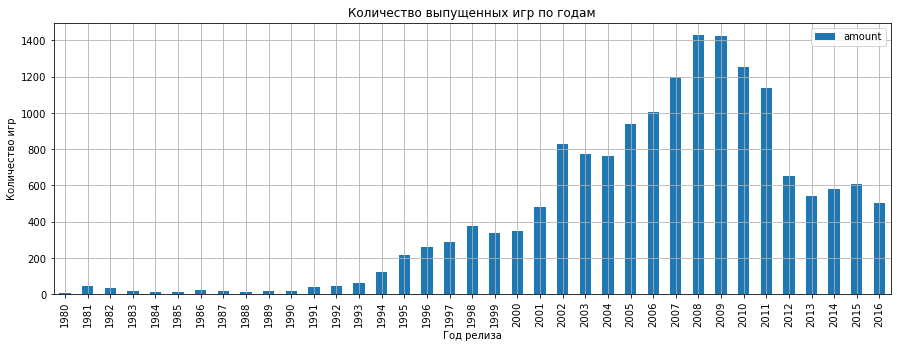

In [24]:
import matplotlib.pyplot as plt # импортируем библиотеку mathlib

# строим столбчатую диаграмму по количеству выпущенных игр в зависимости от года

amount_by_year.plot(
    kind='bar',
    x='year_of_release',
    y='amount', 
    grid=True,
    figsize=(15,5)
)
plt.ylabel('Количество игр') # название оси ординат
plt.xlabel('Год релиза') # название оси абцисс
plt.title('Количество выпущенных игр по годам') # заголовок графика
plt.show()

По графику видно, в какие годы игры выпускались наиболее активно, больше всего в 2008 и 2009 годах, после 1993 года идет постепенный рост, после 2011 резко уменьшается и сохраняется дальше примерно на одно уровне - около 600 игр в год, это может быть обусловлено ростом производительности мобильных устройств и перетеканием части игрового рынка туда.

Рассмотрим, как меняются продажи в зависимости от платформы.

In [25]:
# делаем сводную таблицу по платформам и суммарным продажам и считаем сумму продаж по каждой платформе

platform_sales = games_info.pivot_table(
    index = 'platform',  
    values = 'total_sales', 
    aggfunc = 'sum'
).sort_values(by='total_sales', ascending = False).reset_index()
platform_sales.head(10) # выводим первые 10 строк таблицы

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


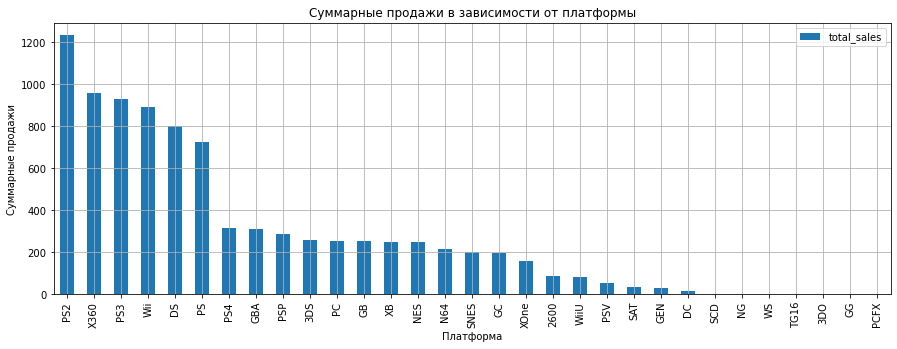

In [26]:
# строим столбчатую диаграмму суммарных для каждой платформы

platform_sales.plot(
    kind='bar',
    x='platform',
    y='total_sales', 
    grid=True,
    figsize=(15,5)
)
plt.ylabel('Суммарные продажи') # название оси ординат
plt.xlabel('Платформа') # название оси абцисс
plt.title('Суммарные продажи в зависимости от платформы') # заголовок графика
plt.show()

Лидерами рынка являются Play Station (PS2, PS3, PS), Xbox (X360), Nintendo(Wii, DS).

In [27]:
# выделяем лидеров продаж с помощью метда query()

sales_leaders = games_info.query('platform == ["PS2", "PS3", "PS", "X360", "Wii", "DS"]').reset_index()
sales_leaders.head() # выводим на экран несколько первых строк

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Посчитаем количество выпущенных игр в зависимости от платформы за каждый год

In [28]:
# создаем сводную таблицу с этими параметрами и считаем количество, переименовываем столбец name в count

sales_leaders_top = sales_leaders.pivot_table(
    index = ['platform', 'year_of_release'], values = 'name', aggfunc = 'count').rename(
    columns={'name': 'count'}).reset_index()
sales_leaders_top.head() # выводим на экран несколько первых строк

,platform,year_of_release,count
0,DS,1985,1
1,DS,2004,23
2,DS,2005,118
3,DS,2006,201
4,DS,2007,376


### Определение актульного периода

Для каждой из выбранных нами платформ построим зависимость продаж от года релиза.

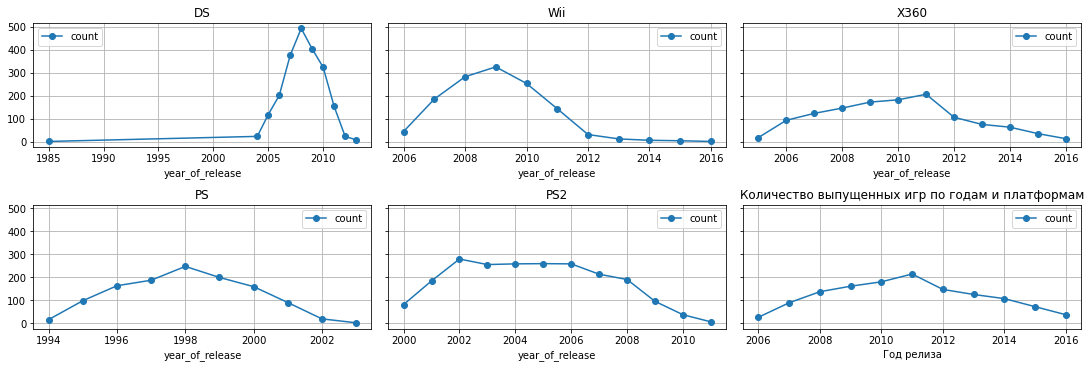

In [29]:
import matplotlib.pyplot as plt # импортируем библиотеку
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(18,10), constrained_layout=True) # задаем вывод графиков рядом

sales_leaders_top.query('platform == "DS"').plot(
    x='year_of_release',
    y='count', 
    grid=True,
    style='-o',
    figsize=(15,5),
    title='DS',
    ax=axes[0,0]
)

sales_leaders_top.query('platform == "Wii"').plot(
    x='year_of_release',
    y='count', 
    grid=True,
    style='-o',
    figsize=(15,5),
    title='Wii',
    ax=axes[0,1]
)

sales_leaders_top.query('platform == "X360"').plot(
    x='year_of_release',
    y='count', 
    grid=True,
    style='-o',
    figsize=(15,5),
    title='X360',
    ax=axes[0,2]
)

sales_leaders_top.query('platform == "PS"').plot(
    x='year_of_release',
    y='count', 
    grid=True,
    style='-o',
    figsize=(15,5),
    title='PS',
    ax=axes[1,0]
)

sales_leaders_top.query('platform == "PS2"').plot(
    x='year_of_release',
    y='count', 
    grid=True,
    style='-o',
    figsize=(15,5),
    title='PS2',
    ax=axes[1,1]
)

sales_leaders_top.query('platform == "PS3"').plot(
    x='year_of_release',
    y='count', 
    grid=True,
    style='-o',
    figsize=(15,5),
    title='PS3',
    ax=axes[1,2]
)
plt.ylabel('Количество игр') # название оси ординат
plt.xlabel('Год релиза') # название оси абцисс
plt.title('Количество выпущенных игр по годам и платформам') # заголовок графика
plt.show()

Примерно каждые 5 лет появляется новая платформа и спустя еще 5 лет исчезает с рынка ее предыдущая версия.

Для построения прогноза нужно выбрать актуальный период. Опираясь на график с числом выпущенных игр по годам, можем сказать, что начиная с 2012 года производство игр снизилось и последние 5 лет находится в стабильном положении, поэтому возьмем период с 2012 по 2016 годы.

In [30]:
# делаем срез данных по годам, оставляем с 2012 по 2016 годы

actual_games_info = games_info.query('year_of_release > 2011').reset_index()
actual_games_info.head() # выводим на экран несколько первых строк

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Здесь и далее будем вести анализ и рассчеты относительно актуального периода.

### Лидеры продаж по платформам

Посмотрим, изменятся ли лидеры продаж по платформам в актуальном для нас периоде.

In [31]:
# создаем сводную таблицу по платформам и считаем сумму продаж для каждой из них

df = actual_games_info.pivot_table(
    index = 'platform',  
    values = 'total_sales', 
    aggfunc = 'sum'
).sort_values(by='total_sales', ascending = False).reset_index() # сортируем значения по возрастанию, оставляем индексы

df.head(10) # выводим на экран несколько первых строк

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


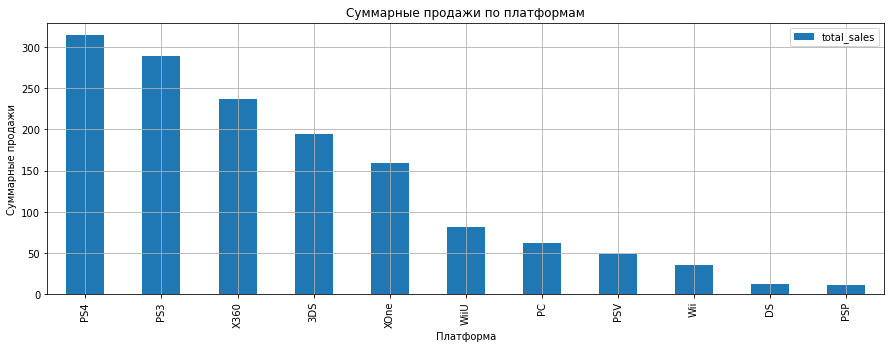

In [32]:
# строим столбчатую диаграмму суммарных продаж в зависимости от платформы

df.plot(
    kind='bar',
    x='platform',
    y='total_sales', 
    grid=True,
    figsize=(15,5)
)
plt.ylabel('Суммарные продажи') # название оси ординат
plt.xlabel('Платформа') # название оси абцисс
plt.title('Суммарные продажи по платформам') # заголовок графика
plt.show()

Заметим, что лидеры рынка поменялись - на первое место вышла новейшая версия PS4, в лидеры так же выбились новые лидеры - 3DS(новая версия Nintendo) и XOne(новая версия XBOX), PS2 пропала с рынка совсем, а PC, Wii и DS ушли в хвост рейтинга продаж.
Потенциально прибыльные платформы на будущий год - **PS4, PS3, XOne, X360, 3DS**.

In [33]:
df1 = actual_games_info.pivot_table(
    index = 'year_of_release',
    columns = 'platform',  
    values = 'total_sales', 
    aggfunc = 'sum'
)
df1

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Судя по данным этой сводной таблицы платформы PS3 и X360 приближаются к "вымиранию".

### "Ящик с усами" по глобальным продажам

Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам.

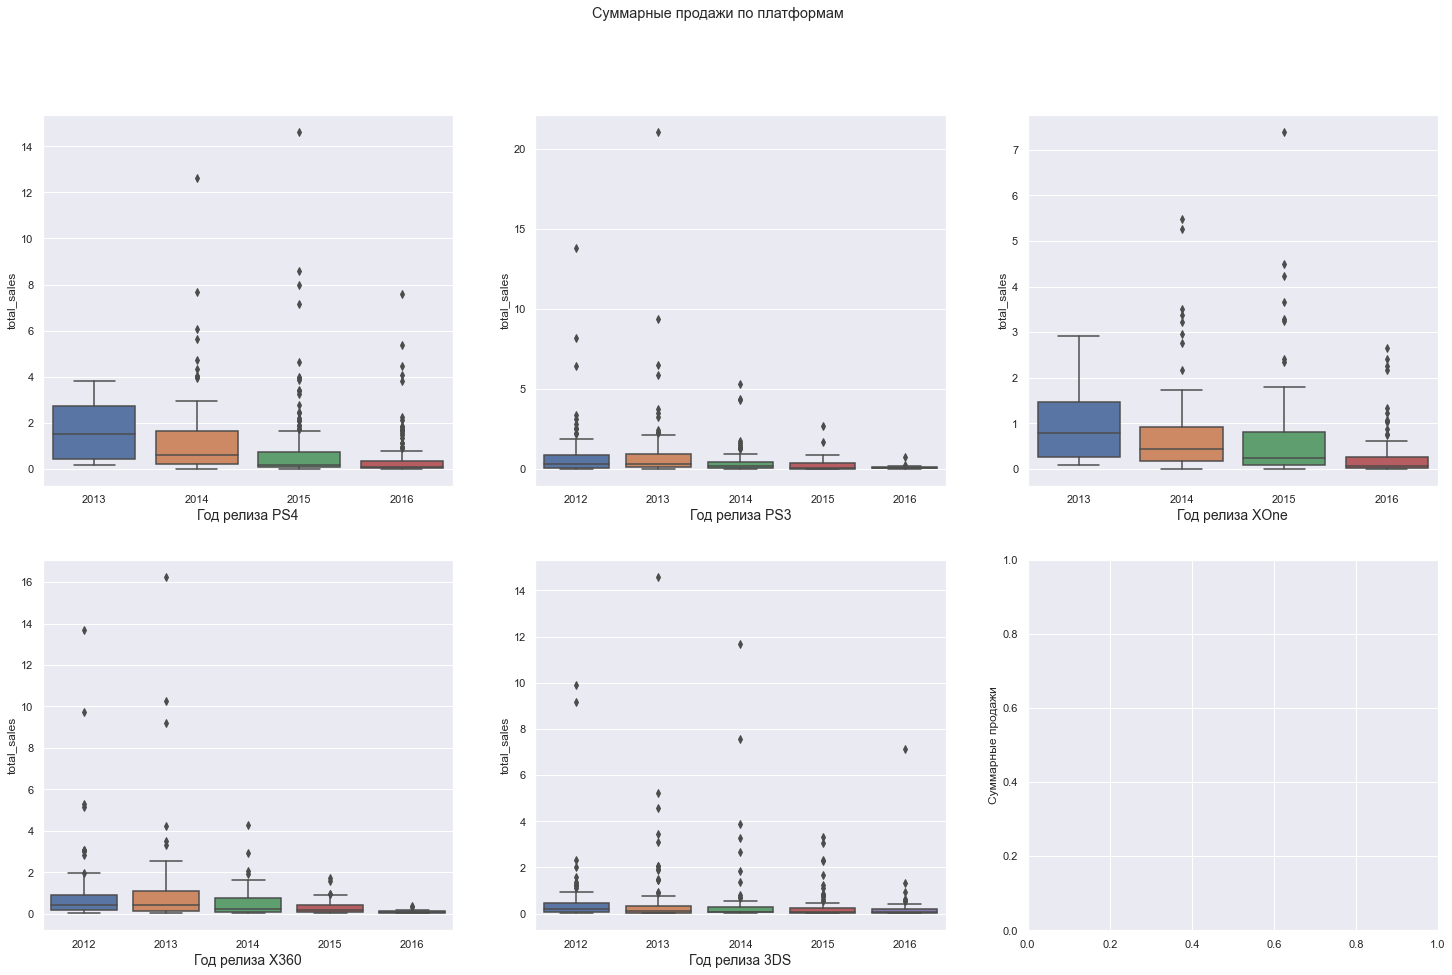

In [34]:
import seaborn as sns # вызываем библиотеку seaborn
sns.set()

fig, axes = plt.subplots(2, 3, figsize=(25, 15)) # задаем положение графиков рядом

fig.suptitle('Суммарные продажи по платформам')

sns.boxplot(ax=axes[0, 0], data=actual_games_info.query('platform == "PS4"'), 
            x='year_of_release', y='total_sales').set_xlabel("Год релиза PS4", fontsize=14
                                                            )
sns.boxplot(ax=axes[0, 1], data=actual_games_info.query('platform == "PS3"'), 
            x='year_of_release', y='total_sales').set_xlabel("Год релиза PS3", fontsize=14
                                                            )
sns.boxplot(ax=axes[0, 2], data=actual_games_info.query('platform == "XOne"'), 
            x='year_of_release', y='total_sales').set_xlabel("Год релиза XOne", fontsize=14
                                                            )
sns.boxplot(ax=axes[1, 0], data=actual_games_info.query('platform == "X360"'), 
            x='year_of_release', y='total_sales').set_xlabel("Год релиза X360", fontsize=14
                                                            )
sns.boxplot(ax=axes[1, 1], data=actual_games_info.query('platform == "3DS"'), 
            x='year_of_release', y='total_sales').set_xlabel("Год релиза 3DS", fontsize=14
                                                            )

plt.show()

Если рассмотреть начало актуальгого периода, а конкретно 2013 год, то можно заметить, что самые большие "ящики" у платформ PS4 и XOne, в этот год они только появились на рынке, это был пик их популярности, а значит и самый большой объем продаж игр на этих платформах. Заметим, что с течением времени ширина "ящика" становится меньше, становится больше одиночных выбросов, те со временем любая платформа теряет свою популярность. Наличие выбросов может быть связано с выходом уникальных игр под конкретную платформу.

Построим "ящики с усами" - зависимость продаж от платформы для каждого года из актуального периода отдельно.

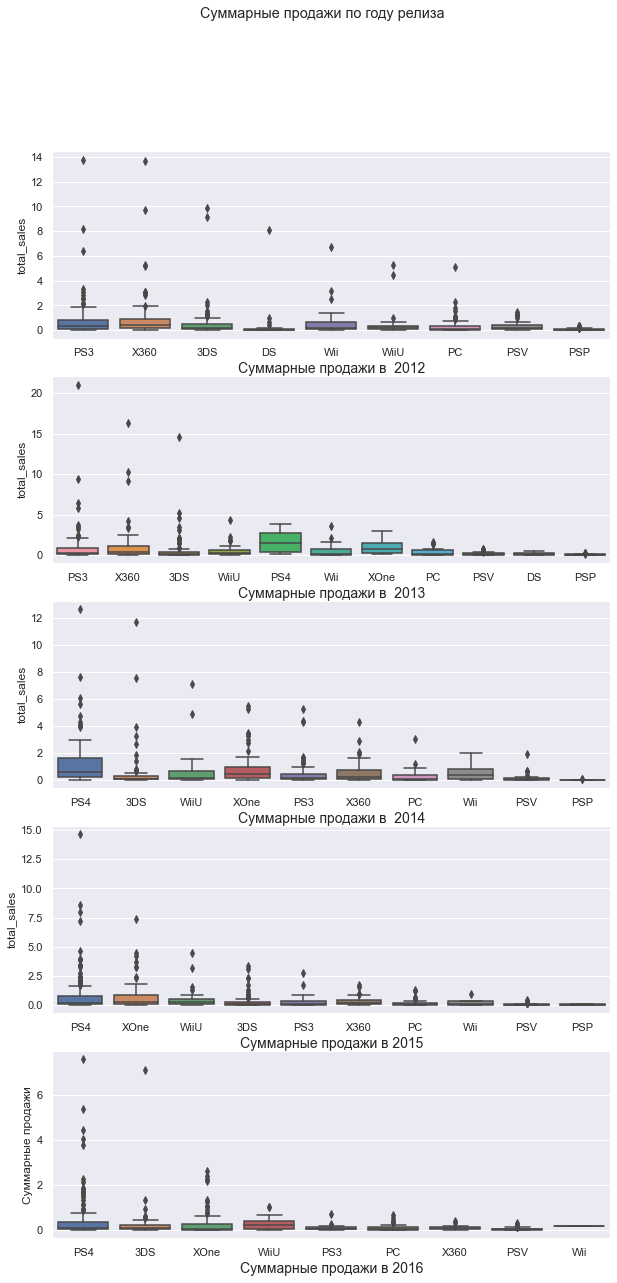

In [35]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20)) 

fig.suptitle('Суммарные продажи по году релиза')

sns.boxplot(ax=axes[0], data=actual_games_info.query('year_of_release == 2012'), 
            x='platform', y='total_sales').set_xlabel("Суммарные продажи в  2012", fontsize=14
                                                            )
sns.boxplot(ax=axes[1], data=actual_games_info.query('year_of_release == 2013'), 
            x='platform', y='total_sales').set_xlabel("Суммарные продажи в  2013", fontsize=14
                                                            )
sns.boxplot(ax=axes[2], data=actual_games_info.query('year_of_release == 2014'), 
            x='platform', y='total_sales').set_xlabel("Суммарные продажи в  2014", fontsize=14
                                                            )
sns.boxplot(ax=axes[3], data=actual_games_info.query('year_of_release == 2015'), 
            x='platform', y='total_sales').set_xlabel("Суммарные продажи в 2015", fontsize=14
                                                            )
sns.boxplot(ax=axes[4], data=actual_games_info.query('year_of_release == 2016'), 
            x='platform', y='total_sales').set_xlabel("Суммарные продажи в 2016", fontsize=14
                                                            )
plt.show()

### Выявление зависимости отзывов пользователей и критиков на продажи

Посмотрим, как влияют на продажи отзывы пользователей и критиков внутри одной платформы на примере PS4, для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

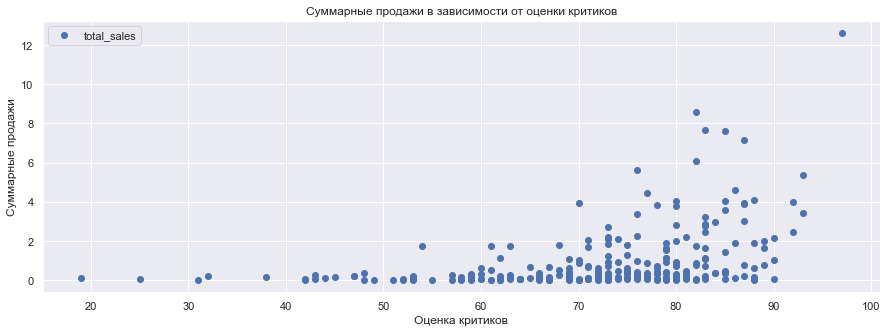

In [36]:
# строим диаграмму рассеяния зависимости между продажами и оценками критиков для платформы PS4

actual_games_info.query('platform == "PS4"').plot(
    x='critic_score',
    y='total_sales', 
    grid=True,
    style='o',
    figsize=(15,5)
)

plt.ylabel('Суммарные продажи') # название оси ординат
plt.xlabel('Оценка критиков') # название оси абцисс
plt.title('Суммарные продажи в зависимости от оценки критиков') # заголовок графика
plt.show()

In [37]:
PS4 = actual_games_info.query('platform == "PS4"')
PS4['critic_score'].corr(PS4['total_sales']) # считаем корреляцию

0.40656790206178095

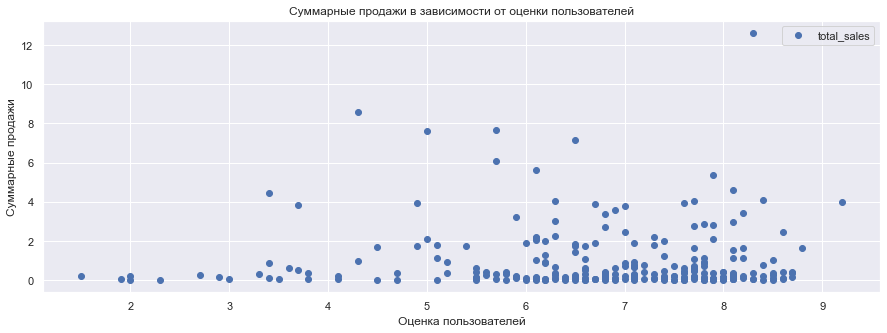

In [38]:
# строим диаграмму рассеяния зависимости между продажами и оценками пользователей для платформы PS4
# для рассчета корреляции и построения распределения убираем 0 из рейтинга пользователей
actual_games_info_slice = actual_games_info.query('user_score > 0') 

actual_games_info_slice.query('platform == "PS4"').plot(
    x='user_score',
    y='total_sales', 
    grid=True,
    style='o',
    figsize=(15,5)
)

plt.ylabel('Суммарные продажи') # название оси ординат
plt.xlabel('Оценка пользователей') # название оси абцисс
plt.title('Суммарные продажи в зависимости от оценки пользователей') # заголовок графика
plt.show()

In [39]:
actual_games_info_slice['user_score'].corr(actual_games_info['total_sales']) # считаем корреляцию Пирсона

0.0044288176754932575

Как по графику так и по рассчету коэффициенту корреляции видим, что продажи не зависят от рейтинга пользователей.

Напишем функцию для построения диаграммы рассеяния и построим их для остальных платформ и посчитаем коэффициенты корреляции.

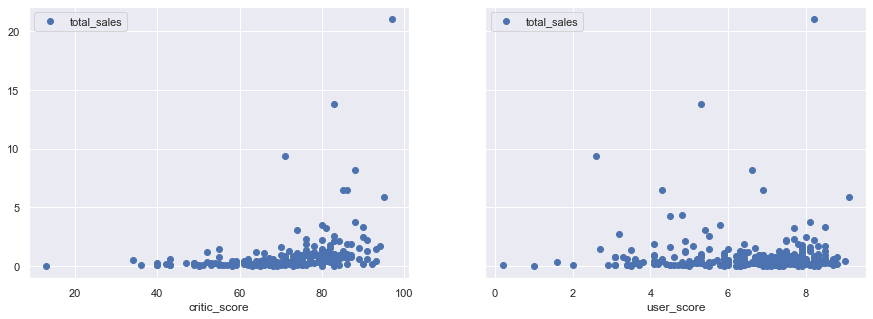

In [40]:
def corr(data):
    import matplotlib.pyplot as plt # импортируем библиотеку
    fig, axes = plt.subplots(1, 2, sharey=True)
    
    data.plot(
    x='critic_score',
    y='total_sales', 
    grid=True,
    style='o',
    figsize=(15,5),
    ax=axes[0]
    )
    
    data.plot(
    x='user_score',
    y='total_sales', 
    grid=True,
    style='o',
    figsize=(15,5),
    ax=axes[1]
    )
 
plt.show()

corr(actual_games_info_slice.query('platform == "PS3"')) # строим диаграммы рассеяния для платформы PS3


In [41]:
PS3 = actual_games_info_slice.query('platform == "PS3"')
PS3['critic_score'].corr(PS3['total_sales']) # считаем корреляцию для PS3

0.3310566175801407

In [42]:
PS3['user_score'].corr(PS3['total_sales']) # считаем корреляцию для ps3

-0.005143522887113815

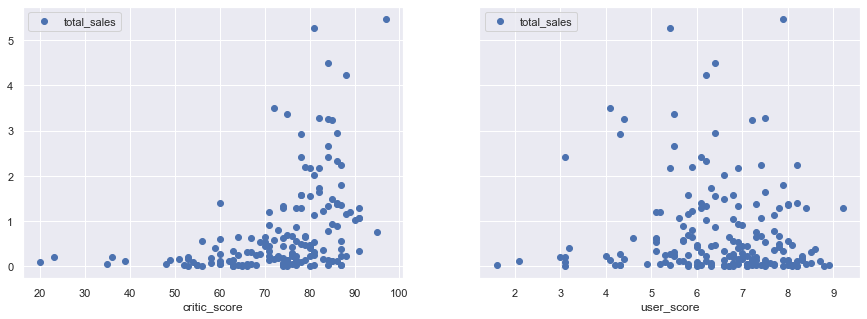

In [43]:
corr(actual_games_info_slice.query('platform == "XOne"')) # строим диаграммы рассеяния для платформы XOne

In [44]:
XOne = actual_games_info_slice.query('platform == "XOne"')
XOne['critic_score'].corr(XOne['total_sales']) # считаем корреляцию для XOne

0.41042203561296375

In [45]:
XOne['user_score'].corr(XOne['total_sales']) # считаем корреляцию для Xone

-0.06892505328279414

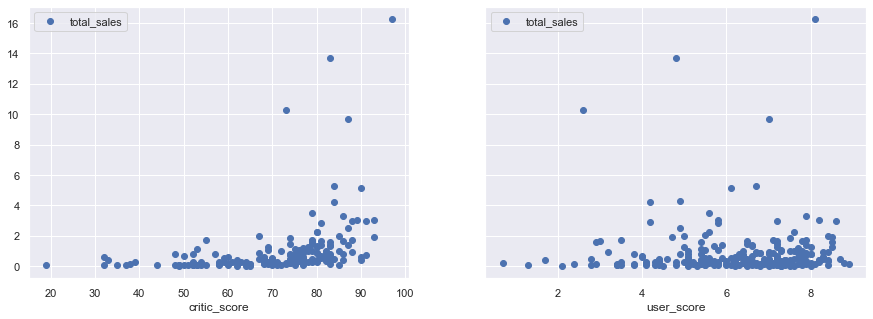

In [46]:
corr(actual_games_info_slice.query('platform == "X360"')) # строим диаграммы рассеяния для платформы X360

In [47]:
X360 = actual_games_info_slice.query('platform == "X360"')
X360['critic_score'].corr(X360['total_sales']) # считаем корреляцию для X360

0.3605734888507336

In [48]:
X360['user_score'].corr(X360['total_sales']) # считаем корреляцию для X360

0.006163978646213326

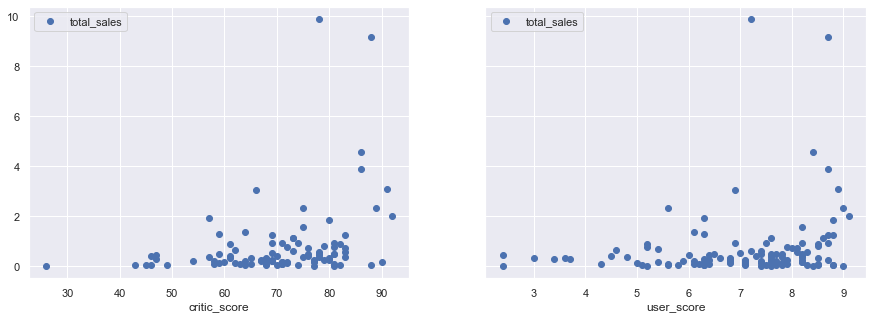

In [49]:
corr(actual_games_info_slice.query('platform == "3DS"')) # строим диаграммы рассеяния для платформы 3DS

In [50]:
n3DS = actual_games_info_slice.query('platform == "3DS"')
n3DS['critic_score'].corr(n3DS['total_sales']) # считаем корреляцию для 3DS

0.31055301915326294

In [51]:
n3DS['user_score'].corr(n3DS['total_sales']) # считаем корреляцию для 3DS

0.19758263411038599

Для остальных платформ прослеживается та же связь - продажи слабо зависят от оценки критиков и не зависят от оценки пользователей.

### Выявление зависимости продаж от жанра игры

Посмотрим распределение продаж по жанрам.

In [52]:
# делаем сводную таблицу по суммарным продажам в зависимости от жанра

genre_sales = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'total_sales', 
    aggfunc = 'sum'
).sort_values(by='total_sales', ascending = False).reset_index()

genre_sales.head(10) # выводим 10 первых строк таблицы

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


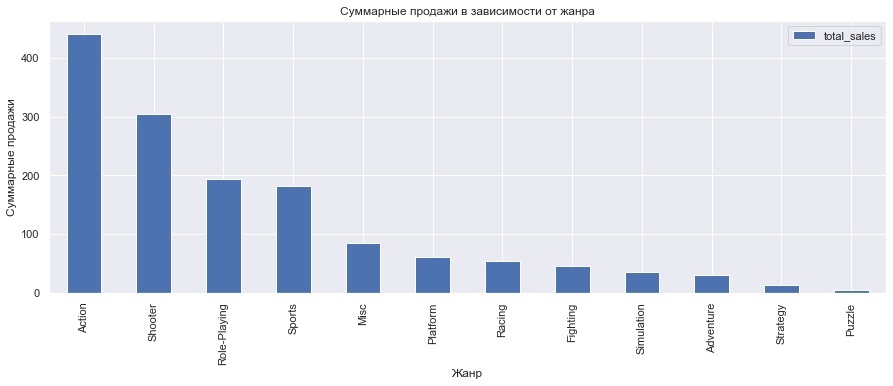

In [53]:
# строим столбчатую диаграмму распределения суммарных продаж по жанрам

genre_sales.plot(
    kind='bar',
    x='genre',
    y='total_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Суммарные продажи') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Суммарные продажи в зависимости от жанра') # заголовок графика
plt.show()

Виден явный лидер - игры в жанре *Action*, так же в топе - *Shooter*, *Role-Playing* и *Sports*.
Хуже всего продаются жанры *Puzzle* и *Strategy*.

Посмотрим как респределится объем продаж в расчете на единицу игры, составим сводную таблицу, где посчитаем медианное значение продаж на каждый жанр.

In [54]:
genre_sales_median = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'total_sales', 
    aggfunc = 'median'
).sort_values(by='total_sales', ascending = False).reset_index()

genre_sales_median.head(10)

,genre,total_sales
0,Shooter,0.44
1,Sports,0.24
2,Platform,0.21
3,Role-Playing,0.14
4,Racing,0.14
5,Fighting,0.13
6,Action,0.12
7,Misc,0.12
8,Simulation,0.12
9,Strategy,0.08


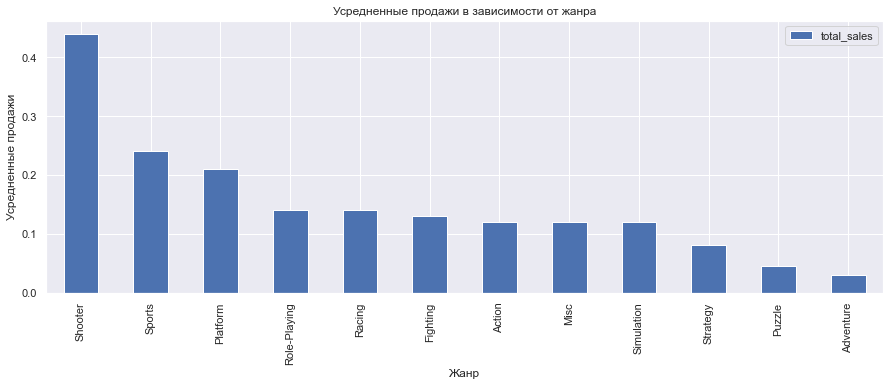

In [55]:
# строим столбчатую диаграмму распределения усредненных продаж на каждую игру по жанрам

genre_sales_median.plot(
    kind='bar',
    x='genre',
    y='total_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Усредненные продажи') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Усредненные продажи в зависимости от жанра') # заголовок графика
plt.show()

## ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА

Проанализируем ранее расмотренные параметры в отдельности для каждого региона: Северная Америка, Европа и Япония. Сделаем сводные таблицы данных по каждому региону.

### Выявление зависимости продаж от платформы по регионам

In [56]:
# создаем сводную таблицу для продаж в Северной Америке в зависимости от платформы

platform_NA = actual_games_info.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
platform_NA.sort_values(by='na_sales', ascending=False)

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31
8,WiiU,38.10
2,PC,19.12
7,Wii,17.45
6,PSV,10.98
1,DS,4.59


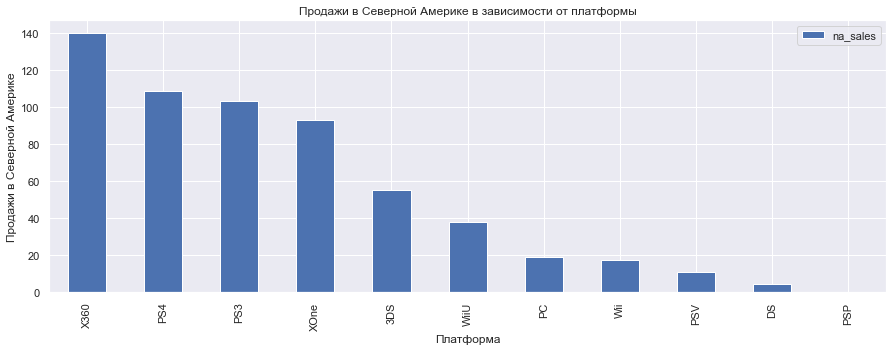

In [57]:
# строим столбчатую диаграмму распределения продаж в Северной Америке в зависимости от платформы

platform_NA.sort_values(by='na_sales', ascending=False).plot(
    kind='bar',
    x='platform',
    y='na_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Северной Америке') # название оси ординат
plt.xlabel('Платформа') # название оси абцисс
plt.title('Продажи в Северной Америке в зависимости от платформы') # заголовок графика
plt.show()

В Северной Америке с большим отрывом лидирует платформа X360. В топ-5 входят PS4, PS3, XOne и 3DS.

In [58]:
# создаем сводную таблицу для продаж в Европе в зависимости от платформы

platform_EU = actual_games_info.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
platform_EU.sort_values(by='eu_sales', ascending=False)

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64
2,PC,37.76
8,WiiU,25.13
7,Wii,11.92
6,PSV,11.36
1,DS,3.53


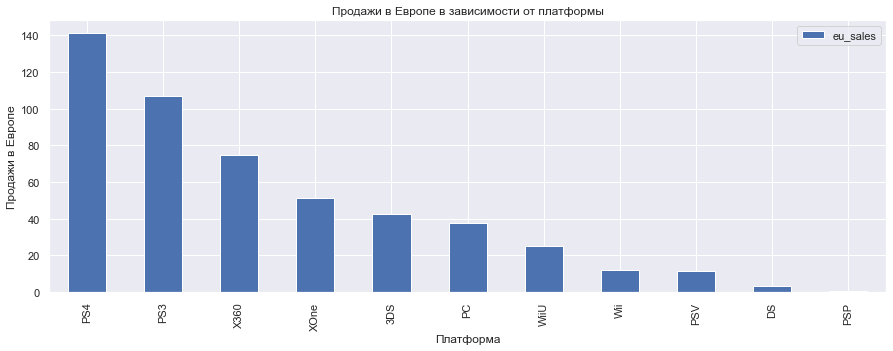

In [59]:
# строим столбчатую диаграмму распределения продаж в Европе в зависимости от платформы

platform_EU.sort_values(by='eu_sales', ascending=False).plot(
    kind='bar',
    x='platform',
    y='eu_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Европе') # название оси ординат
plt.xlabel('Платформа') # название оси абцисс
plt.title('Продажи в Европе в зависимости от платформы') # заголовок графика
plt.show()

Для Европы ближе платформы *Play Station*, PS4 лидирует, следоим идет предыдущая версия PS3 и только потом X360 и XOne, завершает пятерку лидеров платформа 3DS от Nintendo.

In [60]:
# создаем сводную таблицу для продаж в Японии в зависимости от платформы

platform_JP = actual_games_info.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
platform_JP.sort_values(by='jp_sales', ascending=False)

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01
5,PSP,10.47
1,DS,3.72
7,Wii,3.39
9,X360,1.57
10,XOne,0.34


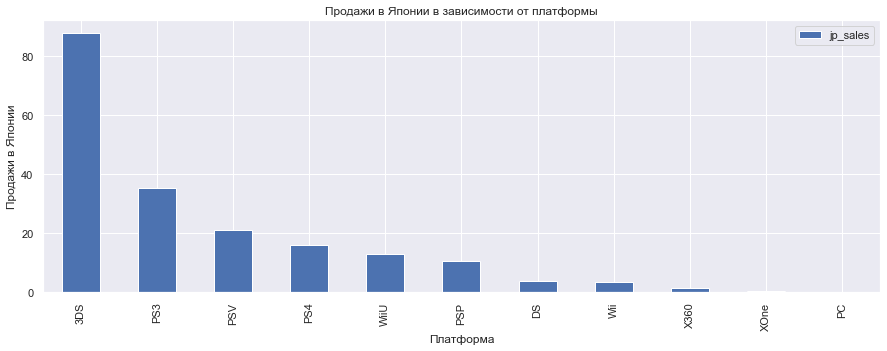

In [61]:
# строим столбчатую диаграмму распределения продаж в Японии в зависимости от платформы

platform_JP.sort_values(by='jp_sales', ascending=False).plot(
    kind='bar',
    x='platform',
    y='jp_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Японии') # название оси ординат
plt.xlabel('Платформа') # название оси абцисс
plt.title('Продажи в Японии в зависимости от платформы') # заголовок графика
plt.show()

В Японии с большим отрывом лидирует платформа 3DS (Nintendo). Так же в топ-5 входят PS3, PSV, PS4 и WiiU.

In [62]:
# создаем сводную таблицу для продаж в других регионах в зависимости от платформы

platform_other = actual_games_info.pivot_table(index='platform', values='other_sales', aggfunc='sum').reset_index()
platform_other.sort_values(by='other_sales', ascending=False)

,platform,other_sales
4,PS4,48.35
3,PS3,43.26
9,X360,20.40
10,XOne,14.27
0,3DS,8.87
8,WiiU,5.95
6,PSV,5.80
2,PC,5.77
7,Wii,2.61
1,DS,0.71


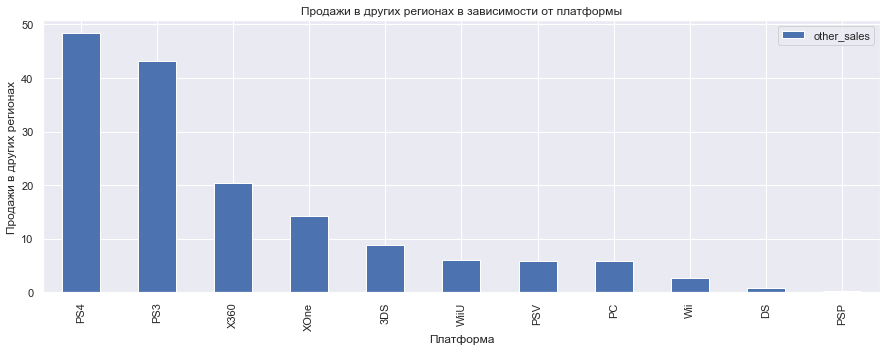

In [63]:
# строим столбчатую диаграмму распределения продаж в других регионах в зависимости от платформы

platform_other.sort_values(by='other_sales', ascending=False).plot(
    kind='bar',
    x='platform',
    y='other_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в других регионах') # название оси ординат
plt.xlabel('Платформа') # название оси абцисс
plt.title('Продажи в других регионах в зависимости от платформы') # заголовок графика
plt.show()

Для остальных регионов с большим отрывом лидируют платформы *PLay Station* - PS4 и PS3, далее идут X360, XOne и 3DS.

### Выявление зависимости продаж от жанра игры по регионам

Проанализируем суммарны продажи в зависимости от жанра по разным регионам.

In [64]:
# создадим сводную таблицу зависимости суммарных продаж в Северной Америке от жанра 

NA_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'na_sales', 
    aggfunc = 'sum'
).sort_values(by='na_sales', ascending = False).reset_index()

NA_genre.head(10)

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


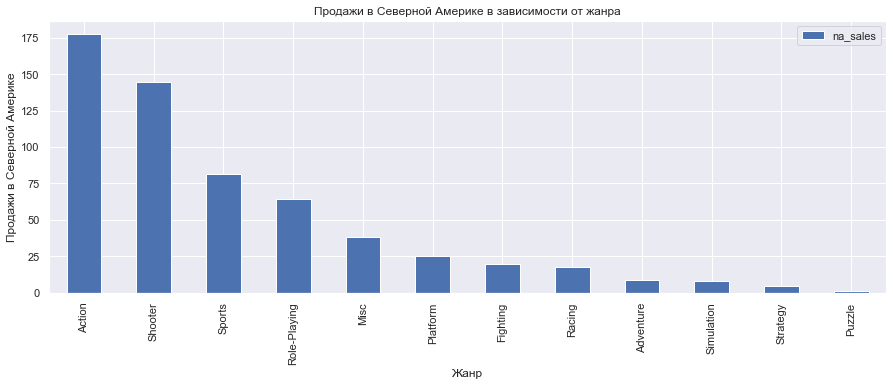

In [65]:
# строим столбчатую диаграмму распределения продаж в Северной Америке в зависимости от жанра

NA_genre.plot(
    kind='bar',
    x='genre',
    y='na_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Северной Америке') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи в Северной Америке в зависимости от жанра') # заголовок графика
plt.show()

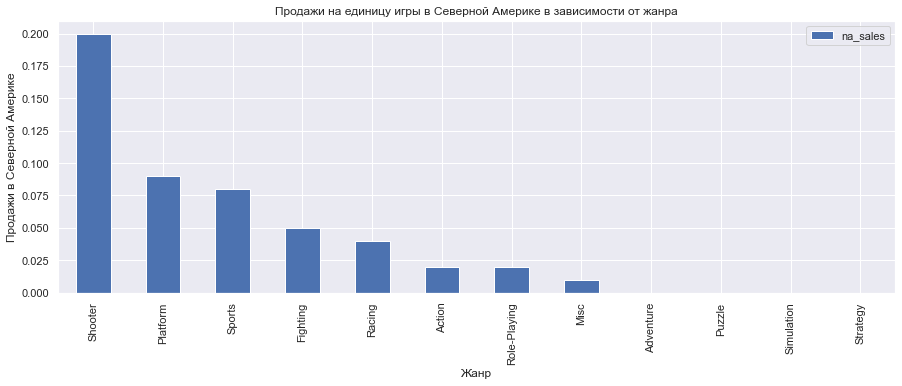

In [66]:
# смотрим распределение продаж по жанрам на единицу игры в СА

NA_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'na_sales', 
    aggfunc = 'median'
).sort_values(by='na_sales', ascending = False).reset_index().plot(
    kind='bar',
    x='genre',
    y='na_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Северной Америке') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи на единицу игры в Северной Америке в зависимости от жанра') # заголовок графика
plt.show()

In [67]:
# создадим сводную таблицу зависимости суммарных продаж в Европе от жанра 

EU_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'eu_sales', 
    aggfunc = 'sum'
).sort_values(by='eu_sales', ascending = False).reset_index()

EU_genre.head(10)

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


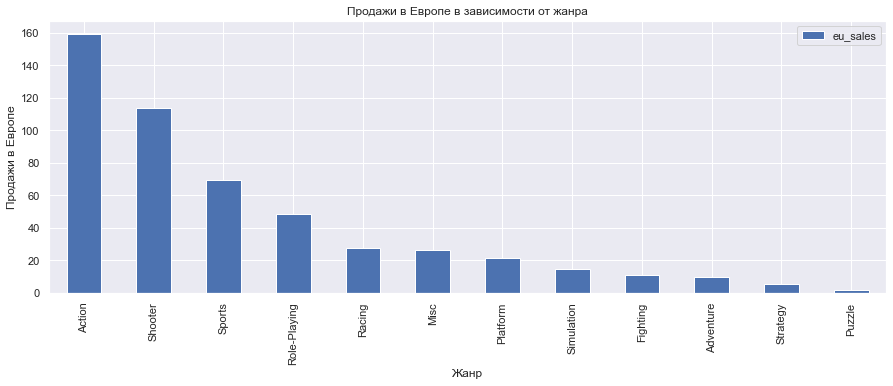

In [68]:
# строим столбчатую диаграмму распределения продаж в Европе в зависимости от жанра

EU_genre.plot(
    kind='bar',
    x='genre',
    y='eu_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Европе') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи в Европе в зависимости от жанра') # заголовок графика
plt.show()

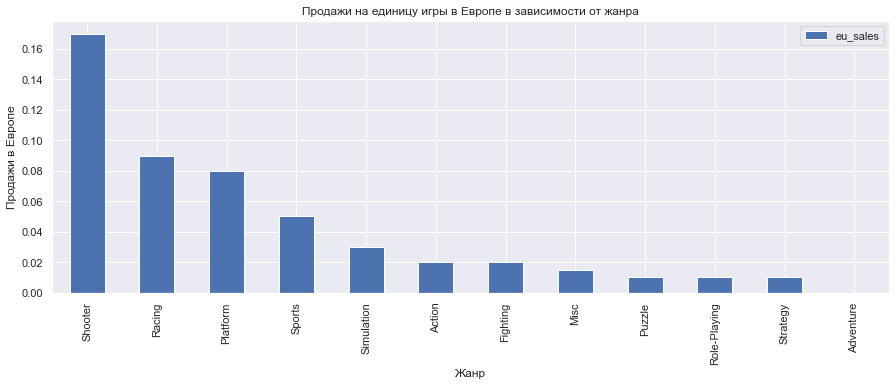

In [69]:
# смотрим распределение продаж по жанрам на единицу игры в Европе

EU_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'eu_sales', 
    aggfunc = 'median'
).sort_values(by='eu_sales', ascending = False).reset_index().plot(
    kind='bar',
    x='genre',
    y='eu_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Европе') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи на единицу игры в Европе в зависимости от жанра') # заголовок графика
plt.show()

In [70]:
# создадим сводную таблицу зависимости суммарных продаж в Японии от жанра 

JP_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'jp_sales', 
    aggfunc = 'sum'
).sort_values(by='jp_sales', ascending = False).reset_index()

JP_genre.head(10)

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


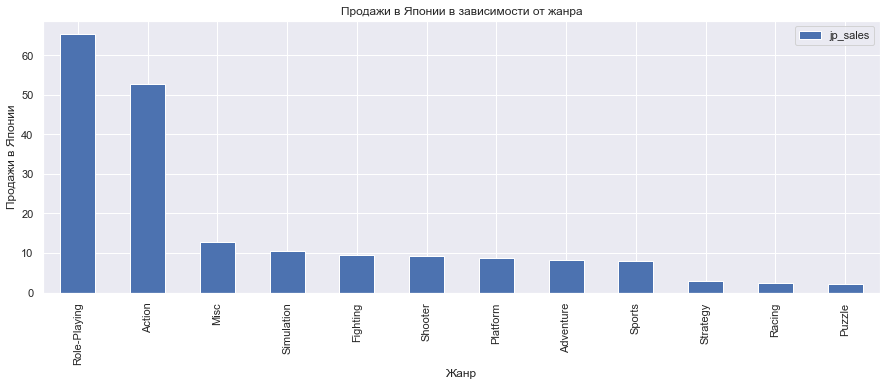

In [71]:
# строим столбчатую диаграмму распределения продаж в Японии в зависимости от жанра

JP_genre.plot(
    kind='bar',
    x='genre',
    y='jp_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Японии') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи в Японии в зависимости от жанра') # заголовок графика
plt.show()

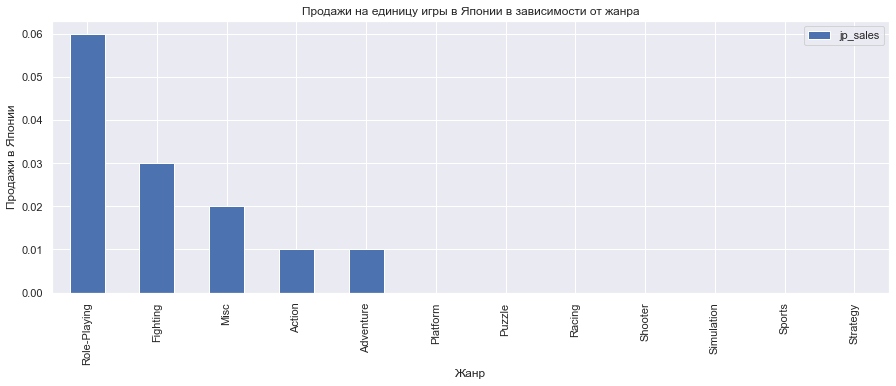

In [72]:
#смотрим распределение продаж по жанрам на единицу игры в Японии

JP_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'jp_sales', 
    aggfunc = 'median'
).sort_values(by='jp_sales', ascending = False).reset_index().plot(
    kind='bar',
    x='genre',
    y='jp_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в Японии') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи на единицу игры в Японии в зависимости от жанра') # заголовок графика
plt.show()

In [73]:
# создадим сводную таблицу зависимости суммарных продаж в других регионах от жанра 

other_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'other_sales', 
    aggfunc = 'sum'
).sort_values(by='other_sales', ascending = False).reset_index()

other_genre.head(10)

,genre,other_sales
0,Action,51.14
1,Shooter,37.26
2,Sports,22.44
3,Role-Playing,14.83
4,Misc,7.67
5,Racing,6.49
6,Platform,5.58
7,Fighting,4.47
8,Adventure,2.81
9,Simulation,2.19


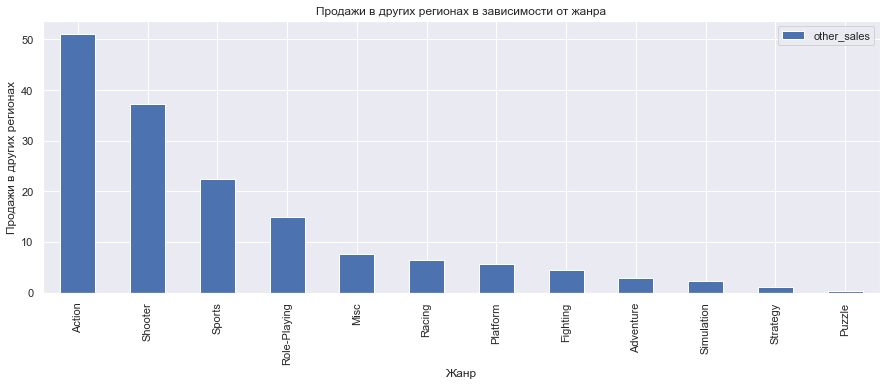

In [74]:
# строим столбчатую диаграмму распределения продаж в других регионах в зависимости от жанра

other_genre.plot(
    kind='bar',
    x='genre',
    y='other_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в других регионах') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи в других регионах в зависимости от жанра') # заголовок графика
plt.show()

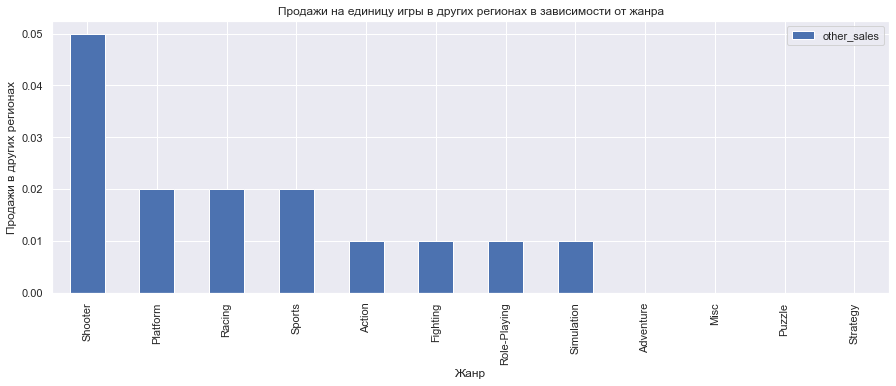

In [75]:
# смотрим распределение продаж по жанрам на единицу игры в других регионах

other_genre = actual_games_info.pivot_table(
    index = 'genre',  
    values = 'other_sales', 
    aggfunc = 'median'
).sort_values(by='other_sales', ascending = False).reset_index().plot(
    kind='bar',
    x='genre',
    y='other_sales', 
    grid=True,
    figsize=(15,5)
)

plt.ylabel('Продажи в других регионах') # название оси ординат
plt.xlabel('Жанр') # название оси абцисс
plt.title('Продажи на единицу игры в других регионах в зависимости от жанра') # заголовок графика
plt.show()

Разместим получившиеся распределения на одном графике.

In [76]:
# создаем таблицу для построения графика

y1 = actual_games_info.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')

y2 = actual_games_info.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')

y3 = actual_games_info.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')

y4 = actual_games_info.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')

bars = pd.concat([y1,y2,y3,y4], axis=1)
bars


,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,55.31,42.64,87.79,8.87
DS,4.59,3.53,3.72,0.71
PC,19.12,37.76,0.00,5.77
PS3,103.38,106.86,35.29,43.26
PS4,108.74,141.09,15.96,48.35
PSP,0.13,0.42,10.47,0.17
PSV,10.98,11.36,21.04,5.80
Wii,17.45,11.92,3.39,2.61
WiiU,38.10,25.13,13.01,5.95


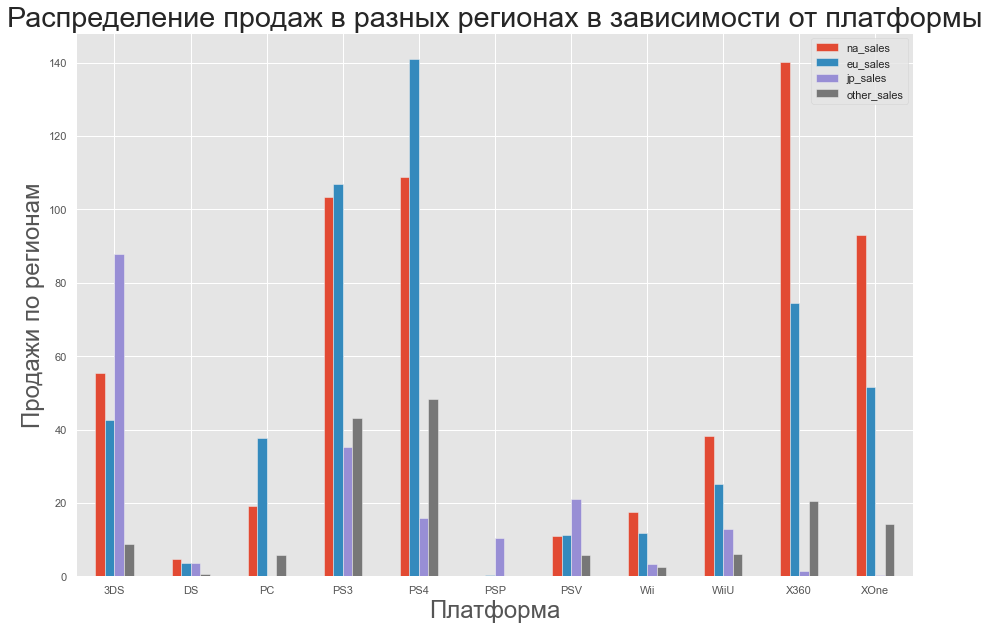

In [77]:
import matplotlib # импортируем библиотеку mathlib

#строим график

matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (15,10)

ax = bars.plot.bar()

plt.ylabel('Продажи по регионам')
plt.xlabel('Платформа')
plt.title('Распределение продаж в разных регионах в зависимости от платформы')
plt.xticks(rotation=360)
plt.show()

### Выявление влияния рейтинга ERSB на продажи в разных регионах

Посмотрим, влияет ли рейтинг ESRB на продажи в каждом регионе отдельно. Добавим расшифровку буквенного обозначения рейтинга:

- *'E' ('Everyone) — 'Для всех'*
- *'E10+' ('Everyone 10 and older') - 'Для всех от 10 лет и старше'*
- *'T' ('Teen') — 'Подросткам'*
- *'M' ('Mature') — 'Для взрослых'*

*Unknown* - рейтинг отсутствует.

In [78]:
# сгруппируем таблицу по рейтингу и продажам в Северной Америке, посчитаем суммарные продажи 

NA_rating = actual_games_info.groupby('rating')['na_sales'].sum()

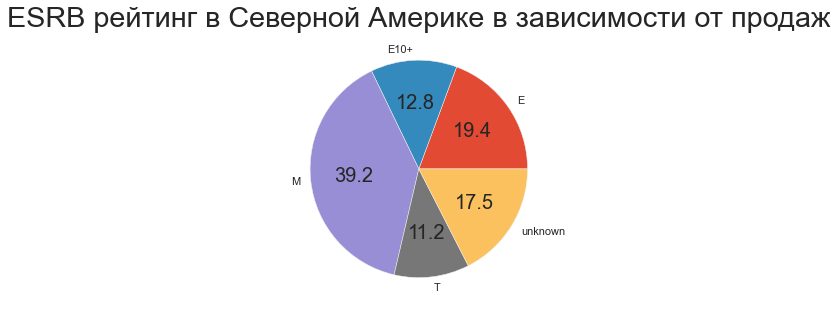

In [98]:
# построим круговую диаграмму

NA_rating.plot(
    kind='pie',
    x='rating',
    y='na_sales', 
    grid=True,
    figsize=(15,5),
    autopct='%.1f',
    title='ESRB рейтинг в Северной Америке в зависимости от продаж'
)

ax = plt.gca()
ax.yaxis.set_visible(False)
plt.show()

In [80]:
# сгруппируем таблицу по рейтингу и продажам в Европе, посчитаем суммарные продажи 

EU_rating = actual_games_info.groupby('rating')['eu_sales'].sum()

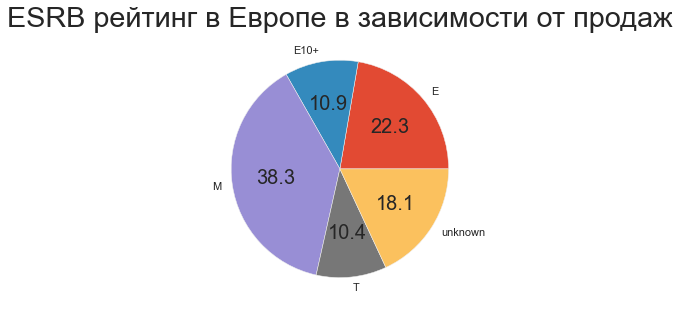

In [99]:
# построим круговую диаграмму

EU_rating.plot(
    kind='pie',
    x='rating',
    y='eu_sales', 
    grid=True,
    figsize=(15,5),
    autopct='%.1f',
    title='ESRB рейтинг в Европе в зависимости от продаж'
)

ax = plt.gca()
ax.yaxis.set_visible(False)
plt.show()

In [82]:
# сгруппируем таблицу по рейтингу и продажам в Японии, посчитаем суммарные продажи 

JP_rating = actual_games_info.groupby('rating')['jp_sales'].sum()

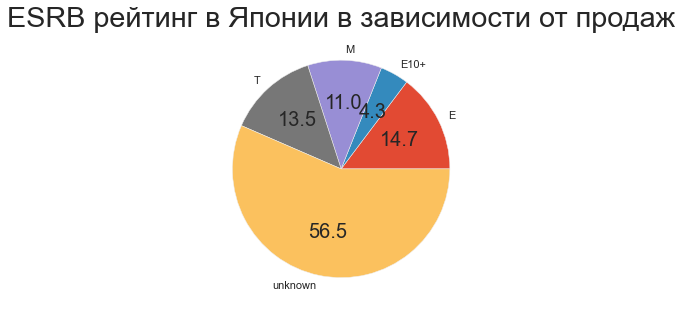

In [100]:
# построим круговую диаграмму

JP_rating.plot(
    kind='pie',
    x='rating',
    y='jp_sales', 
    grid=True,
    figsize=(15,5),
    autopct='%.1f',
    title='ESRB рейтинг в Японии в зависимости от продаж'
)

ax = plt.gca()
ax.yaxis.set_visible(False)
plt.show()

In [84]:
# сгруппируем таблицу по рейтингу и продажам в других регионах, посчитаем суммарные продажи 

other_rating = actual_games_info.groupby('rating')['other_sales'].sum()

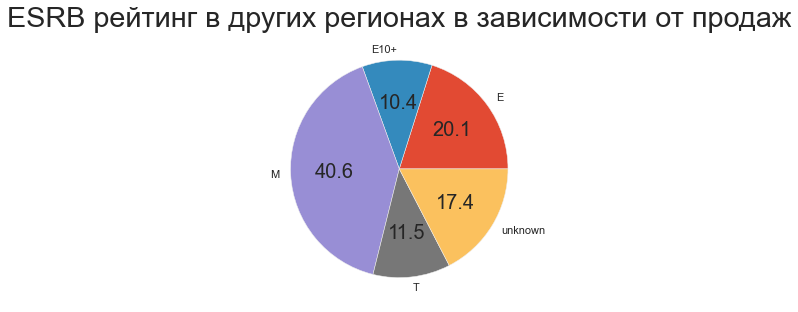

In [101]:
# построим круговую диаграмму

other_rating.plot(
    kind='pie',
    x='rating',
    y='other_sales', 
    grid=True,
    figsize=(15,5),
    autopct='%.1f',
    title='ESRB рейтинг в других регионах в зависимости от продаж'
)

ax = plt.gca()
ax.yaxis.set_visible(False)
plt.show()

Посчитаем, как объем продаж игры приходится на каждый регион.

In [86]:
total_na = actual_games_info['na_sales'].sum()
total_na

590.97

In [87]:
total_eu = actual_games_info['eu_sales'].sum()
total_eu

506.82000000000005

In [88]:
total_jp = actual_games_info['jp_sales'].sum()
total_jp

192.58

In [89]:
total_other = actual_games_info['other_sales'].sum()
total_other

156.16

Больше всего игр продают в Северной Америке, меньше продают в Европе, а в Японии и остальных регионах всместе взятых почти в 2 раза меньше чем в Северной Америке.

### ВЫВОД
В Северной Америке лидирует плафторма X360, в Европе - PS4, в Японии - 3DS, можно объяснить это географией производства той или иной платформы - X360 (Xbox) производят в США, 3DS (Nintendo) - в Японии.

Для всех регионов кроме Японии характерны игры в жанрах Action, Shooter, Sports, Role-Playing, Misc, для Японии же свой топ по жанрам - с большим отрывом Role-Playing и Action, далее Misc, Simulation, Fighting, это объясняется культурными особенностями этой экзотичной восточной страны. Если оценивать продажи на единицу игры, то популярнее всего жанр Shooter, а в Японии все-так же остается Role-Playing.

По всем регионам отмечается одинаковый тренд - больше всего продаж идет с "игр для взрослых" и игр "для всех". Отметим, что *Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде*, поэтому в Японии более половины объема продаж игр не имеют рейтинга. 

## ПРОВЕРКА ГИПОТЕЗ

Имеется две гипотезы для проверки:

1. "Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые"
2. "Средние пользовательские рейтинги жанров *Action* (англ. "действие", экшн-игры) и *Sports* (англ. "спортивные соревнования") разные"

###  Первая гипотеза
Сформулируем нулевую гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", тогда альтернативаная гипотеза:  "Средние пользовательские рейтинги платформ Xbox One и PC разные. И ппроверим равенство дисперсий стат.тестом Барлетта.

In [90]:
from scipy.stats import bartlett

platform_XOne = actual_games_info.query('platform == "XOne"')
platform_PC = actual_games_info.query('platform == "PC"')
stat, p1 = bartlett(platform_XOne['user_score'], platform_PC['user_score'])
p1

0.383137976573241

Очень маленькое значение p предполагает, что совокупности не имеют одинаковых дисперсий, поэтому для проверки гипотез будем задавать параметр equal_var=False.

In [91]:
from scipy import stats as st

alpha = 0.05 # задаем критический уровень статистической значимости

# проверим гипотезу о равенстве средних двух независимых совокупностей

results =  st.ttest_ind(platform_XOne['user_score'], platform_PC['user_score'], equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue) # выведим на экран полученное p-значение)

if results.pvalue < alpha: # сравниваем p-значение с заданным критическим уровнем стат. значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5197773083212891
Не получилось отвергнуть нулевую гипотезу


Полученное значение pvalue говорит о том, что средние пользовательские рейтинги  платфомр XOne и PC одинаковы.

###  Вторая гипотеза
Сформулируем нулевую гипотезу: "Средние пользовательские рейтинги жанров *Action* (англ. "действие", экшн-игры) и *Sports* (англ. "спортивные соревнования") разные", тогда альтернативная гипотеза: "Средние пользовательские рейтинги жанров *Action* (англ. "действие", экшн-игры) и *Sports* (англ. "спортивные соревнования") одинаковые".

Проверим равенство дисперсий стат.тестом Барлетта.

In [92]:
from scipy.stats import bartlett

action = actual_games_info.query('genre == "Action"')
sports = actual_games_info.query('genre == "Sports"')
stat, p2 = bartlett(action['user_score'], sports['user_score'])
p2

0.76908192043187

Диспресии не равны, поэтому для проверки гипотез будем задавать параметр equal_var=False.

In [93]:
# проверим гипотезу о равенстве средних двух независимых совокупностей

results =  st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue) # выведим на экран полученное p-значение)

if results.pvalue < alpha: # сравниваем p-значение с заданным критическим уровнем стат. значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1855920874619919e-11
Отвергаем нулевую гипотезу


Значение pvalue очень мало, поэтому отвергаем нулевую гипотезу, это значит, что средние пользовательские рейтинги для жанров Action и Sports одинаковые.

## ОБЩИЙ ВЫВОД

Мы провели анализ данных о продажах игр в зависимости от оценки пользователей и экспертов, жанров и платформ, региона и рейтинга ERSB.

В данных были обнаружены пропущенные значения, некорректные типы данных, выбивающиеся значения. Эти проблемы были решены на этапе предобработки данных.

Были поссчитаны суммарные продажи для каждой игры - самые большие продажи за весь период исследования у игры "Wii Sports"(82,54 млн  проданных копий).

Объем продаж игр постепенно растет после 1993 года, максимальный объем продаж в 2008 и 2009 годах, а после 2011 резко уменьшается и сохраняется дальше примерно на одном уровне - около 600 игр в год.

Лидирующими платформами по объему продаж являются: Play Station (PS2, PS3, PS), Xbox (X360), Nintendo(Wii, DS).

Для построения прогноза на будущий год был выбран актуальный период для анализа с 2012 по 2016 годы. Потенциально прибыльные платформы на будущий год - PS4, PS3, XOne, X360, 3DS.

По построенным boxplot-ам сделали вывод, что больший объем продаж у платформы при ее выходе на рынок и с течением времени она теряет свою популярность.

Покупатели больше ориентируются на оценки критиков, чем на оценки пользователей, но и там зависимость не слишком сильная.

По жанру виден явный лидер - игры в жанре Action, так же в топе - Shooter, Role-Playing и Sports. Хуже всего продаются жанры Puzzle и Strategy. Так же отметим, что жанр Action набирает объем продаж за счет разнообразия игр, если же нас интересует объем продаж на единицу игры, то бесспорным лидером будет жанр Shooter.

Мы составили **портерт пользователя для каждого региона**: 
Популярные платформы (с бОльшей долей продаж):
- в Северной Америке лидирует плафторма X360
- в Европе - PS4
- в Японии - 3DS
- в остальных регионах - PS3 и PS4

Для всех регионов кроме Японии характерны игры в жанрах Action, Shooter, Sports, Role-Playing, Misc, для Японии же свой топ по жанрам - с большим отрывом Role-Playing и Action, далее Misc, Simulation, Fighting. 
Очевидно, наиболее популярны "игры для взрослых" и "игры для всех", соответственно они имеют и бОльшие продажи.

Проверка гипотез показала, что средние пользовательские рейтинги для платфомр XOne и PC одинаковы, для жанров Action и Sports такй же оценки пользователей одинаковы.

По проведенному исследованию, можно сделать вывод, что в будущем году будут популярны новейшие платформы производителей, а так же их предшественники. В зависимости от региона лидеры продаж будут разниться. Но тк объем рынка гораздо больше в Северной Америке и Европе, стоит ориентироваться на них, но так же на опираясь на сделанные ранее выводы жизненный цикл платформы около 10 лет и среди выявленных лидеров есть уже "отмирающие" платформы и хотя, например, в Северной Америке лидирует платформа X360, ее продажи постепенно падают за последние 5 лет и стали очень малы по сравнению с новыми плафтормами, поэтому ее не будет в списке потенциально популярных на будущий год (топ платформ: PS4, XOne и 3DS; топ жанров: Action, Shooter, Sports, Role-Playing, Misc). 